In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [25]:
sklearn.__version__

'0.23.2'

In [26]:
#df=pd.read_csv(r'C:\Users\HP\Desktop\One Year Life expectancy post thoracic surgery using IBM watson studio\dataset\ThoracicSurgery.csv')

In [27]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0cfa7d9b95b1465ea81afa2abe108478 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LIJeEdrBanH0fNSvaor0PsTvvc_P8ls8pwhtqfinopj3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_0cfa7d9b95b1465ea81afa2abe108478.get_object(Bucket='lifeexpectancy-donotdelete-pr-nrgzkumkiqmlts',Key='ThoracicSurgery.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [28]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [29]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [30]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [31]:
df['Death_1yr'].unique()

array([0, 1])

In [32]:
df.shape

(454, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [34]:
df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [35]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


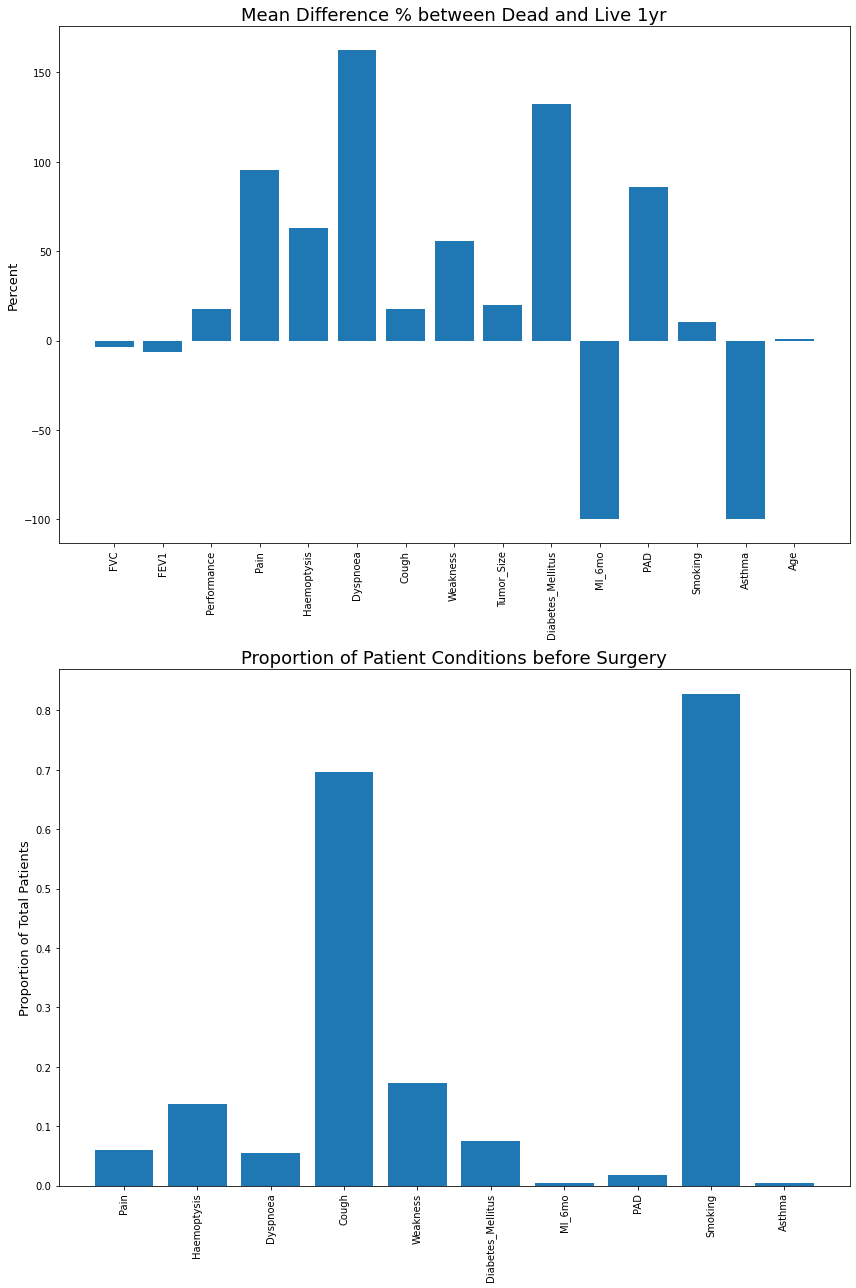

In [36]:

# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()



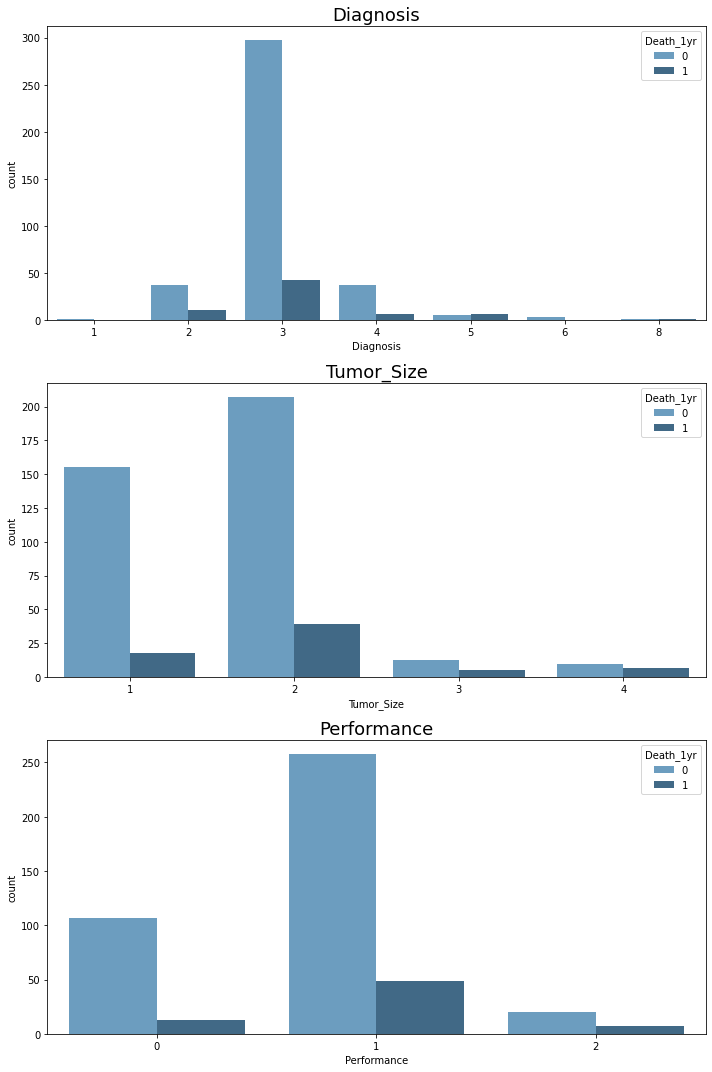

In [37]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

In [38]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [39]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1615), ('FEV1', 0.0539), ('Performance', 0.0302), ('Pain', 0.105), ('Haemoptysis', 0.0661), ('Dyspnoea', 0.0219), ('Cough', 0.031), ('Weakness', 0.0518), ('Tumor_Size', 0.0005), ('Diabetes_Mellitus', 0.0218), ('MI_6mo', 0.7205), ('PAD', 0.3467), ('Smoking', 0.0625), ('Asthma', 0.7204), ('Age', 0.2833)]


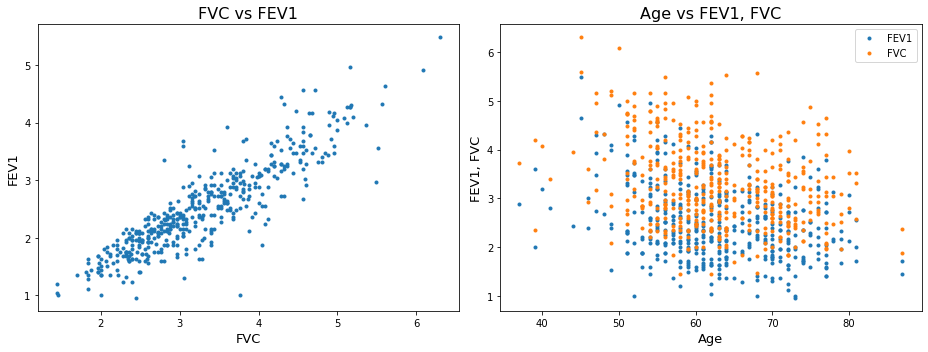

In [40]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [41]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.8875452733829001

In [42]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0,1]

-0.2994299196604911

In [43]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798917

In [44]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

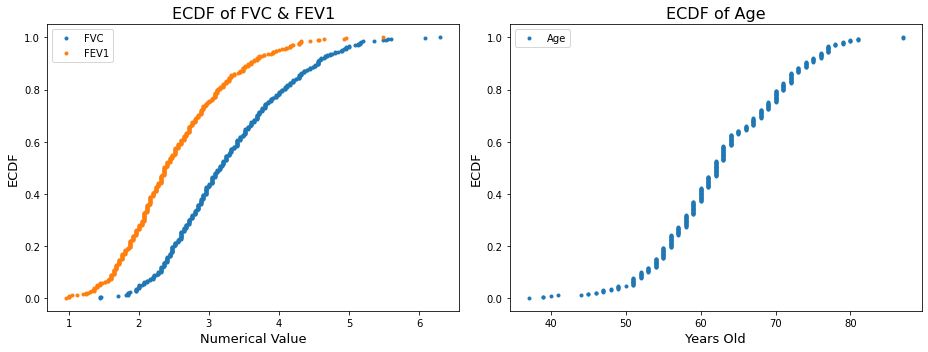

In [45]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)
plt.tight_layout()

In [46]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [47]:
#drop the columns
df.drop(['FVC'],axis=1, inplace=True)

In [48]:
df.head()

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [49]:
x=df.iloc[:,0:15]
y=df.iloc[:,15:16]

In [50]:
x.head()

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,2,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73


In [51]:
y.shape

(454, 1)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
x_train.shape

(363, 15)

In [54]:
x_train.head()

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
52,4,2.52,1,0,0,0,1,0,2,0,0,0,1,0,75
74,3,2.80,1,0,0,0,1,0,4,0,0,0,1,0,41
26,3,3.06,1,0,0,0,1,1,1,0,0,0,1,0,68
45,3,3.28,1,0,0,0,1,0,2,0,0,0,1,0,67
122,3,2.68,1,0,0,0,1,0,1,0,0,0,1,0,62


In [55]:
print(y_train)

     Death_1yr
52           0
74           1
26           1
45           0
122          0
..         ...
323          0
192          0
117          0
47           0
172          0

[363 rows x 1 columns]


In [56]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (363, 15)
Shape of y_train (363, 1)
Shape of x_test (91, 15)
Shape of y_test (91, 1)


In [57]:
print(x_train[-2:-1])
# print(y_train.dtype)

    Diagnosis  FEV1  Performance  Pain  Haemoptysis  Dyspnoea  Cough  \
47          3  3.12            2     0            0         0      1   

    Weakness  Tumor_Size  Diabetes_Mellitus  MI_6mo  PAD  Smoking  Asthma  Age  
47         1           2                  0       0    0        1       0   59  


In [58]:
!pip install -U scikit-learn==0.23

     |████████████████████████████████| 7.2 MB 15.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [59]:
import sklearn
sklearn.__version__

'0.23.2'

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [61]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [62]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators= 10)
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [63]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [64]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [65]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [66]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[61 13]
 [12  5]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        74
           1       0.28      0.29      0.29        17

    accuracy                           0.73        91
   macro avg       0.56      0.56      0.56        91
weighted avg       0.73      0.73      0.73        91

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[72  2]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.00      0.00      0.00        17

    accuracy                           0.79        91
   macro avg       0.40      0.49      0.44        91
weighted avg       0.66      0.79      0.72        91

-----------------------------------------------------------------------

/tmp/wsuser/ipykernel_155/3391280684.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
/tmp/wsuser/ipykernel_155/2938543466.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
pip install -U scikit-learn==0.23

Note: you may need to restart the kernel to use updated packages.


In [69]:
import sklearn

In [70]:
sklearn.__version__

'0.23.2'

In [71]:
# Random forest model is selected

rf = RandomForestClassifier(n_estimators= 10)
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

/tmp/wsuser/ipykernel_155/2874574350.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [72]:
f1_score(yPred,y_test,average='weighted')

0.8783331618333234

In [73]:
cv = cross_val_score(rf,x,y,cv=5)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selec

In [74]:
np.mean(cv)

0.8392429792429793

In [75]:
# Decsision tree model

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
yPred_dt = dt.predict(x_test)

In [76]:
f1_score(yPred_dt,y_test,average='weighted')

0.7142857142857143

In [77]:
cv = cross_val_score(rf,x,y,cv=5)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selec

In [78]:
np.mean(cv)

0.8282051282051281

In [79]:
# kneighbors

kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
yPred_kn = kn.predict(x_test)

/tmp/wsuser/ipykernel_155/2676795723.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kn.fit(x_train,y_train)


In [80]:
f1_score(yPred_kn,y_test,average='weighted')

0.862881562881563

In [81]:
cv = cross_val_score(kn,x,y,cv=5)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_se

In [82]:


np.mean(cv)

0.8326495726495727

In [83]:
# GradientBoosting is selected

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
yPred_gb = gb.predict(x_test)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})


In [84]:
f1_score(yPred_gb,y_test,average='weighted')

0.8313425704730053

In [85]:
cv = cross_val_score(gb,x,y,cv=5)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-package

In [86]:


np.mean(cv)

0.8304273504273505

Testing

In [87]:
x_test[4]

array([-0.08649018,  0.91178508, -1.4003118 , -0.24112141, -0.37080992,
       -0.24112141,  0.71879529, -0.47930129,  0.32504216, -0.24112141,
        0.        ,  0.        ,  0.40824829, -0.10540926, -0.83249936])

In [88]:
gb.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([1])

In [89]:
rf.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([1])

In [90]:
dt.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([1])

In [91]:
kn.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([0])

In [92]:
df.head()

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [93]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

# IBM Deployment

In [94]:
!pip install -U ibm-watson-machine-learning

In [95]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [96]:
wml_credentials = {
    "apikey":"5W4bo59uFnM08IL5TfNIO2TBEDP2BDc53RPMmXMdtL7b",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [97]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
fb624985-99d4-44ec-bf8a-dc1139020ebf  life_deploy  2022-03-03T08:41:45.291Z
------------------------------------  -----------  ------------------------


In [98]:
SPACE_ID="fb624985-99d4-44ec-bf8a-dc1139020ebf"

In [ ]:
wml_client.set.default_space(SPACE_ID)

In [ ]:
wml_client.software_specifications.list()

In [ ]:
MODEL_NAME = 'LifeModel1'
DEPLOYMENT_NAME = 'life_deploy_3.8'
Life_MODEL = rf

In [82]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [83]:
#Save model
model_details = wml_client.repository.store_model(
    model=Life_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [84]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Death_1yr',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'}],
     'id': '

In [85]:
model_uid = wml_client.repository.get_model_id(model_details)

In [86]:
model_uid

'ab7aa651-131b-49d8-a07b-c9c69c2d7024'

In [87]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [88]:
from sklearn import metrics

In [89]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [90]:
# Deploy
deployment1 = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'ab7aa651-131b-49d8-a07b-c9c69c2d7024' started

#######################################################################################


initializingNote: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='39056a9f-0678-449b-8144-052c42814152'
------------------------------------------------------------------------------------------------




In [194]:
df.head()

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [91]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "5W4bo59uFnM08IL5TfNIO2TBEDP2BDc53RPMmXMdtL7b"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": [["Diagnosis", "FEV1","Age","Performance","Tumor_Size","Haemoptysis","Pain","Dyspnoea","Cough","Weakness","Diabetes_Mellitus","MI_6mo","PAD","Smoking","Asthma"]], "values": [[3,4.08,0,0,0,0,1,0,2,0,0,0,1,0,55]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/39056a9f-0678-449b-8144-052c42814152/predictions?version=2022-03-05', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction', 'probability'], 'values': [[0, [0.7, 0.3]]]}]}


In [195]:
{"input_data": [{"fields": [["Diagnosis", "FEV1","Age","Performance","Tumor_Size","Haemoptysis","Pain","Dyspnoea","Cough","Weakness","Diabetes_Mellitus","MI_6mo","PAD","Smoking","Asthma"]], "values": [[3,4.08,0,0,0,0,1,0,2,0,0,0,1,0,55]]}]}


{'input_data': [{'fields': [['Diagnosis',
     'FEV1',
     'Age',
     'Performance',
     'Tumor_Size',
     'Haemoptysis',
     'Pain',
     'Dyspnoea',
     'Cough',
     'Weakness',
     'Diabetes_Mellitus',
     'MI_6mo',
     'PAD',
     'Smoking',
     'Asthma']],
   'values': [[3, 4.08, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 55]]}]}

## testing the model

In [ ]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "<your API key>"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": [array_of_input_fields], "values": [array_of_values_to_be_scored, another_array_of_values_to_be_scored]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/83e91ed3-2023-4d8f-870e-5e405a6db009/predictions?version=2022-03-04', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())